In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_json("/content/drive/MyDrive/yelp_academic_dataset_business.json",lines = True)
df.head(200)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,x8KYhsxbufQiYIK-4MRzHQ,West Coast Roofing,910 S Santa Rita Ave,Tucson,AZ,85749,32.210447,-110.953571,2.0,13,1,{'BusinessAcceptsCreditCards': 'True'},"Apartments, Roofing, Real Estate, Home Services","{'Monday': '9:0-15:0', 'Tuesday': '9:0-15:0', ..."
196,3S9GYtMOYhbZl4MMPOHT0Q,The Handlebar Boise,1519 W Main St,Boise,ID,83702,43.620010,-116.212790,4.5,34,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...","Bars, Wine Bars, Nightlife, Beer Bar","{'Monday': '0:0-0:0', 'Tuesday': '14:0-22:0', ..."
197,znL4YrNbA2uwOQ3CchkmEA,Seaview Condominiums,14700 Gulf Blvd,Madeira Beach,FL,33708,27.798503,-82.798750,4.5,8,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Vacation Rentals, Real Estate, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
198,CtMEJxpVMlNzFpB4PtFjfA,Aussie Grill,25340 Sierra Center Blvd,Lutz,FL,33559,28.192191,-82.396367,4.0,75,1,"{'BYOB': 'False', 'OutdoorSeating': 'True', 'B...","Restaurants, American (New), Burgers, Fast Foo...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."


In [3]:
import warnings
import matplotlib
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization
# from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings


In [4]:
bu_df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_business.json',lines= True)
bu_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
print("In total we have", bu_df.shape[0], "0users.")

In total we have 150346 0users.


In [6]:
# To show number of open and closed businesses

op = bu_df.groupby('is_open').business_id.count()
op

is_open
0     30648
1    119698
Name: business_id, dtype: int64

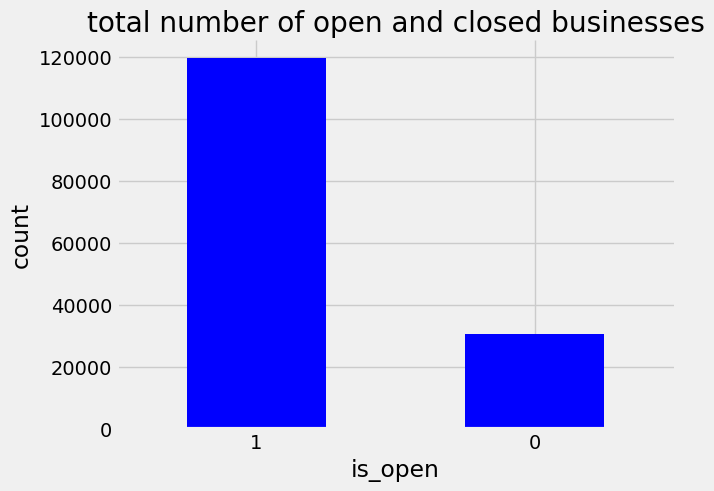

In [7]:
# To plot a bar graph to show the total number of open and closed businesses
bu_df.is_open.value_counts(dropna=False).plot(kind='bar',color='blue', rot=0)
plt.xlabel('is_open')
plt.ylabel('count')
plt.title('total number of open and closed businesses')
sns.despine()

In [8]:
#Drop the rows where is_open=0 (those have been closed)

bu_df.drop(bu_df[bu_df.is_open == 0].index, inplace=True)
bu_df.head(200)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,CWE-NfyMgi28ePUiansSdQ,Jim's Appliance & Furniture,1115 Lusk St,Boise,ID,83706,43.607258,-116.212730,3.5,24,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Appliances, Mattresses, Shopping, Home & Garden","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
245,uDQgmudYDKiB6n4vwbEeDg,Chrysalis,9040 Carothers Pkwy,Franklin,TN,37067,35.956533,-86.802720,4.5,112,1,"{'HasTV': 'False', 'WiFi': 'u'free'', 'Busines...","Restaurants, Italian, Nightlife, Bars, Cocktai...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
246,MyE_zdul_JO-dOHOug4GQQ,Watson Adventures Scavenger Hunts,,Philadelphia,PA,19019,40.119713,-75.009710,3.0,8,1,{'BusinessAcceptsCreditCards': 'True'},"Local Flavor, Team Building Activities, Active...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
248,8p9euqoMCbT4AIL_Fgqb0g,Ballistic Fabrication,2010 W McMillan St,Tuscon,AZ,85705,32.279255,-111.009552,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Machine Shops, Local Services, Automotive, Aut...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [9]:
#hours is in nested form. so we change it into series
hours = bu_df['hours'].apply(pd.Series)
hours.to_json('hours1.json')
hours
hours.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [10]:
attrib = bu_df['attributes'].apply(pd.Series)
attrib.drop('BikeParking', axis = 1, inplace = True)
attrib.drop('BusinessParking', axis = 1, inplace = True)
attrib
attrib.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

In [11]:
attrib_hours = pd.concat([attrib, hours], axis = 1)
attrib_hours
attrib_hours.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [12]:
bu1 = pd.concat([attrib_hours, bu_df], axis = 1)
bu1
bu1.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'attributes', 'categories',
       'hours'],
      dty

In [13]:
bu1.drop('attributes', axis = 1, inplace = True)
bu1.drop('hours', axis = 1, inplace = True)
bu1

,BusinessAcceptsCreditCards,RestaurantsDelivery,OutdoorSeating,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,WheelchairAccessible,...,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
3,False,False,False,1,True,False,u'free',u'none',True,NaN,...,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,True,NaN,NaN,NaN,True,NaN,NaN,NaN,False,True,...,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
5,True,True,True,1,True,False,u'no',u'none',False,True,...,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
6,True,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,NaN,NaN,NaN,3,NaN,False,NaN,NaN,NaN,NaN,...,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"Nail Salons, Beauty & Spas"
150342,True,NaN,NaN,2,NaN,NaN,u'no',NaN,NaN,NaN,...,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,True,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,True,None,NaN,4,None,NaN,NaN,NaN,NaN,NaN,...,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"Fitness/Exercise Equipment, Eyewear & Optician..."


In [14]:
bu1.to_csv('bu_new.csv')
bu1.to_json('bu_new.json')

In [15]:
bu1=pd.read_csv('bu_new.csv')
bu1.drop('Unnamed: 0',axis=1,inplace= True)
bu1
bu1.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'categories'],
      dtype='object')

In [16]:
bu1=pd.read_csv('bu_new.csv')
bu1.drop('Unnamed: 0',axis=1,inplace= True)
bu1

,BusinessAcceptsCreditCards,RestaurantsDelivery,OutdoorSeating,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,WheelchairAccessible,...,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
1,False,False,False,1,True,False,u'free',u'none',True,NaN,...,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,True,NaN,NaN,NaN,True,NaN,NaN,NaN,False,True,...,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
3,True,True,True,1,True,False,u'no',u'none',False,True,...,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,True,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119693,NaN,NaN,NaN,3,NaN,False,NaN,NaN,NaN,NaN,...,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"Nail Salons, Beauty & Spas"
119694,True,NaN,NaN,2,NaN,NaN,u'no',NaN,NaN,NaN,...,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
119695,True,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
119696,True,None,NaN,4,None,NaN,NaN,NaN,NaN,NaN,...,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"Fitness/Exercise Equipment, Eyewear & Optician..."


In [17]:
bu1.categories

0         Shipping Centers, Local Services, Notaries, Ma...
1         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
2                                 Brewpubs, Breweries, Food
3         Burgers, Fast Food, Sandwiches, Food, Ice Crea...
4         Sporting Goods, Fashion, Shoe Stores, Shopping...
                                ...                        
119693                           Nail Salons, Beauty & Spas
119694    Pets, Nurseries & Gardening, Pet Stores, Hobby...
119695    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
119696    Fitness/Exercise Equipment, Eyewear & Optician...
119697    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 119698, dtype: object

In [18]:
df_category_split = bu1['categories'].str.split(',', expand=True)[[0,1,2,3,4,5,6,7,8,9]]
# rename the new columns
df_category_split.columns = ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']
business = pd.concat([bu1, df_category_split], axis=1)
# now drop the actual categories column
business = business.drop(['categories'], axis=1)
# print the head of the dataset
business.head()

,BusinessAcceptsCreditCards,RestaurantsDelivery,OutdoorSeating,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,WheelchairAccessible,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services,None,None,None,None,None
1,False,False,False,1,True,False,u'free',u'none',True,NaN,...,Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries,None,None,None,None,None
2,True,NaN,NaN,NaN,True,NaN,NaN,NaN,False,True,...,Brewpubs,Breweries,Food,None,None,None,None,None,None,None
3,True,True,True,1,True,False,u'no',u'none',False,True,...,Burgers,Fast Food,Sandwiches,Food,Ice Cream & Frozen Yogurt,Restaurants,None,None,None,None
4,True,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,Sporting Goods,Fashion,Shoe Stores,Shopping,Sports Wear,Accessories,None,None,None,None


In [19]:
business_cat=business[['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']]

business_cat

,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services,None,None,None,None,None
1,Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries,None,None,None,None,None
2,Brewpubs,Breweries,Food,None,None,None,None,None,None,None
3,Burgers,Fast Food,Sandwiches,Food,Ice Cream & Frozen Yogurt,Restaurants,None,None,None,None
4,Sporting Goods,Fashion,Shoe Stores,Shopping,Sports Wear,Accessories,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
119693,Nail Salons,Beauty & Spas,None,None,None,None,None,None,None,None
119694,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops,Bird Shops,Home & Garden,Shopping,None,None,None
119695,Shopping,Jewelry,Piercing,Toy Stores,Beauty & Spas,Accessories,Fashion,None,None,None
119696,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods,Bikes,None,None,None,None,None


In [20]:
indian = 'Indian', ' Indian'
mexican = 'Mexican', 'ica Mexn'
thai = 'Thai', ' Thai'
japanese = 'Japanese', ' Japanese'
italian = 'Italian', ' Italian'
american_t = 'American (Traditional)', ' American (Traditional)'
american_new = 'American (New)', ' American (New)'
pakistani = 'Pakistani', ' Pakistani'
french = 'French', ' French'
mid_east = 'Middle Eastern', ' Middle Eastern'
chinese = 'Chinese', ' Chinese'
canadian_new = 'Canadian (New)', ' Canadian (New)'
hungarian = 'Hungarian', ' Hungarian'
german = 'German', ' German'
vietnamese = 'Vietnamese', ' Vietnamese'

business_type = ' Restaurants','Restaurants',' Food','Food' ,' Pizza', 'Pizza', 'Mexican',' Mexican','American (Traditional)', ' American (Traditional)', 'American (New)', ' American (New)', 'Italian', ' Italian', 'Indian', ' Indian', 'Pakistani', ' Pakistani', 'Thai', ' Thai', 'Japanese', ' Japanese', 'French', ' French', 'Canadian (New)', ' Canadian (New)', 'Middle Eastern', ' Middle Eastern', 'German', ' German', 'Vietnamese', ' Vietnamese', 'Chinese', ' Chinese','Hungarian', ' Hungarian'

business_type

(' Restaurants',
 'Restaurants',
 ' Food',
 'Food',
 ' Pizza',
 'Pizza',
 'Mexican',
 ' Mexican',
 'American (Traditional)',
 ' American (Traditional)',
 'American (New)',
 ' American (New)',
 'Italian',
 ' Italian',
 'Indian',
 ' Indian',
 'Pakistani',
 ' Pakistani',
 'Thai',
 ' Thai',
 'Japanese',
 ' Japanese',
 'French',
 ' French',
 'Canadian (New)',
 ' Canadian (New)',
 'Middle Eastern',
 ' Middle Eastern',
 'German',
 ' German',
 'Vietnamese',
 ' Vietnamese',
 'Chinese',
 ' Chinese',
 'Hungarian',
 ' Hungarian')

In [21]:
food = business.loc[(business['category1'].isin(business_type)) | (business['category2'].isin(business_type)) | (business['category3'].isin(business_type)) | (business['category4'].isin(business_type)) | (business['category5'].isin(business_type)) | (business['category6'].isin(business_type)) | (business['category7'].isin(business_type)) | (business['category8'].isin(business_type)) | (business['category9'].isin(business_type)) | (business['category10'].isin(business_type))]
food
food.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'category1', 'category2',
       'category3', 'categor

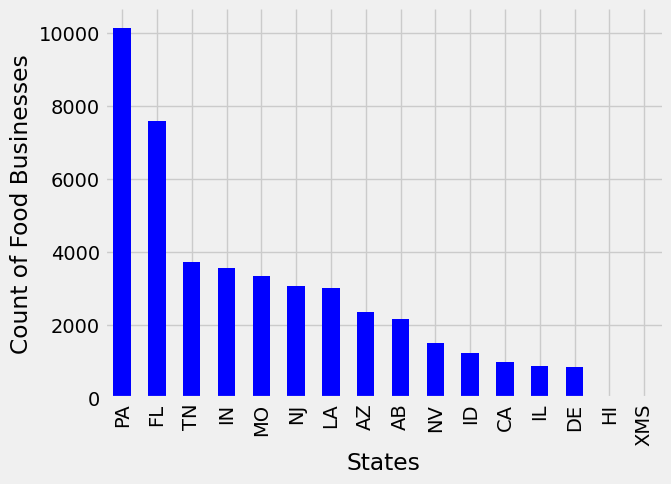

In [22]:
food.state.value_counts(dropna=False)[0:20].plot(kind='bar',color='blue')
plt.ylabel('Count of Food Businesses')
plt.xlabel('States')
sns.despine()

In [23]:
food.state.value_counts()

PA     10149
FL      7608
TN      3743
IN      3564
MO      3357
NJ      3077
LA      3013
AZ      2354
AB      2163
NV      1515
ID      1237
CA       982
IL       874
DE       860
HI         1
XMS        1
Name: state, dtype: int64

In [24]:
food.state

1         PA
2         PA
3         TN
6         TN
8         FL
          ..
119679    PA
119681    ID
119682    AZ
119690    PA
119692    DE
Name: state, Length: 44498, dtype: object

In [25]:
# State=input("Enter state: ")

In [26]:
State='DE'
foodon = food.loc[food['state'].isin([State])]
foodon

,BusinessAcceptsCreditCards,RestaurantsDelivery,OutdoorSeating,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,WheelchairAccessible,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
78,True,True,False,1,True,NaN,u'no',u'none',False,NaN,...,Mexican,Restaurants,None,None,None,None,None,None,None,None
672,True,True,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,Food,Beer,Wine & Spirits,None,None,None,None,None,None,None
864,True,None,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Restaurants,Pizza,None,None,None,None,None,None,None,None
1662,True,False,NaN,2,False,NaN,NaN,NaN,False,NaN,...,Grocery,Flowers & Gifts,Beer,Wine & Spirits,Specialty Food,Shopping,Florists,Food,None,None
2248,True,True,NaN,2,True,NaN,NaN,NaN,NaN,NaN,...,Japanese,Restaurants,Sushi Bars,Noodles,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118774,NaN,NaN,False,1,True,NaN,NaN,NaN,NaN,NaN,...,Mexican,Restaurants,None,None,None,None,None,None,None,None
118848,True,True,NaN,1,False,False,NaN,NaN,NaN,NaN,...,Photography Stores & Services,Convenience Stores,Food,Cosmetics & Beauty Supply,Drugstores,Shopping,Beauty & Spas,None,None,None
118900,True,False,True,3,True,False,u'no',u'full_bar',False,NaN,...,Restaurants,American (New),None,None,None,None,None,None,None,None
119297,True,True,False,1,True,NaN,'no',u'none',True,NaN,...,Chicken Shop,Chicken Wings,Fast Food,Restaurants,None,None,None,None,None,None


In [27]:
foodon.columns[0:66]

Index(['BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'AcceptsInsurance', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'category1', 'category2',
       'category3', 'categor

In [28]:
foodon.drop(foodon.columns[[1,2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]], axis=1, inplace=True)
foodon.to_csv('foodon.csv')
foodon.to_json('foodon.json')
foodon
foodon.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Caters',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10'],
      dtype='object')

In [3]:
import pandas as pd
foodon = pd.read_csv('foodon.csv')
foodon.drop('Unnamed: 0',axis=1,inplace= True)
foodon


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mexican,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,2.0,NaN,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,12:0-17:0,...,Food,Beer,Wine & Spirits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,NaN,NaN,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-21:0,11:0-21:0,11:0-20:0,...,Restaurants,Pizza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,2.0,False,0:0-0:0,9:0-19:0,8:0-21:0,8:0-18:0,8:0-21:0,9:0-19:0,8:0-17:0,...,Grocery,Flowers & Gifts,Beer,Wine & Spirits,Specialty Food,Shopping,Florists,Food,NaN,NaN
4,True,2.0,NaN,11:0-15:0,11:0-15:0,11:0-15:0,11:0-15:0,11:0-15:0,11:30-15:0,11:30-15:0,...,Japanese,Restaurants,Sushi Bars,Noodles,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,NaN,1.0,NaN,NaN,10:30-19:0,10:30-19:0,10:30-19:0,10:30-20:30,8:30-20:30,8:30-19:0,...,Mexican,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,True,1.0,NaN,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,...,Photography Stores & Services,Convenience Stores,Food,Cosmetics & Beauty Supply,Drugstores,Shopping,Beauty & Spas,NaN,NaN,NaN
857,True,3.0,False,NaN,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,NaN,...,Restaurants,American (New),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,True,1.0,True,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-0:0,10:30-0:0,10:30-23:0,...,Chicken Shop,Chicken Wings,Fast Food,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category1'].value_counts()[:20].to_frame()

sns.barplot(cnt['category1'], palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category1')

cnt = foodon['category2'].value_counts()[:20].to_frame()

sns.barplot(cnt['category2'], palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category2')
plt.subplots_adjust(wspace=0.3)
gc.collect()

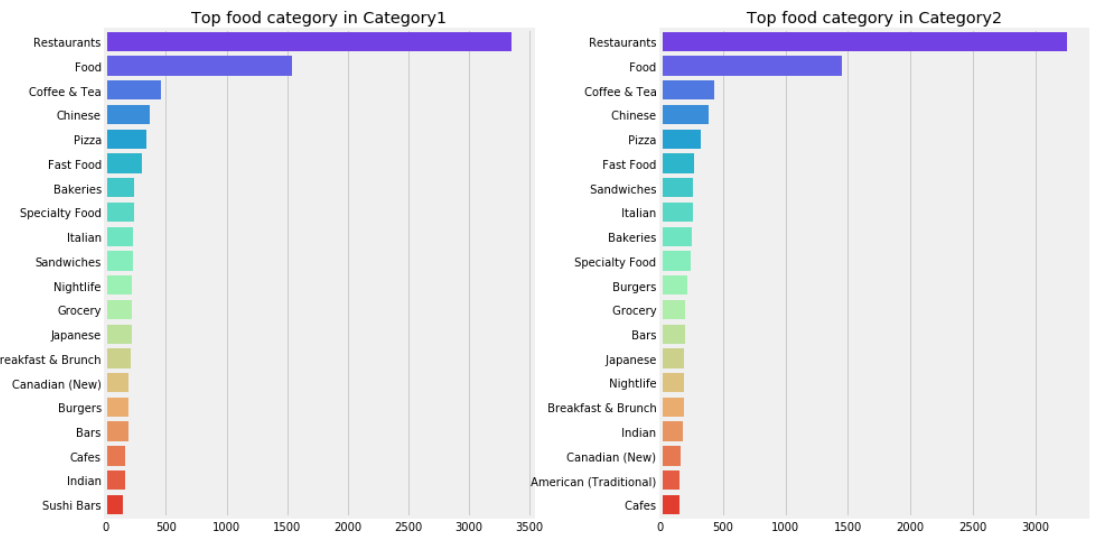

**reading the review dataset and cleaning**



In [2]:
import pandas as pd

# Set the chunk size
chunk_size = 1000

# Read the JSON file in chunks
chunks = pd.read_json("/content/drive/MyDrive/yelp_academic_dataset_review.json", lines=True, chunksize=chunk_size)

# Create a list to store the processed chunks
processed_chunks = []

# Process each chunk
for chunk in chunks:
    # Convert the "date" column to a datetime type
    chunk["date"] = pd.to_datetime(chunk["date"], format='%Y-%m-%d')

    # Add a "year" column to the chunk
    chunk['year'] = chunk.date.dt.year

    # Add the processed chunk to the list
    processed_chunks.append(chunk)

# Merge the processed chunks into a single DataFrame
yelp_review = pd.concat(processed_chunks)


In [3]:
yelp_review.to_csv('review.csv')
yelp_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017
...,...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2014
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2021
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2019
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2022


In [1]:
import pandas as pd
review = pd.read_csv('review.csv')
review.drop('Unnamed: 0', axis=1, inplace=True)
review.head()

<ipython-input-1-85ad31b99e8a>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  review = pd.read_csv('review.csv')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017.0


In [1]:
import pandas as pd
rev = pd.read_csv('review.csv')
rev.drop(rev.columns[[4]], axis=1, inplace=True)
rev.drop('Unnamed: 0', axis=1, inplace=True)
rev.head()

<ipython-input-1-2dee0f188db9>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  rev = pd.read_csv('review.csv')


,review_id,user_id,business_id,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017.0


In [4]:
foodon['BusinessAcceptsCreditCards'] = foodon.BusinessAcceptsCreditCards.astype(str).str.lower()
foodon['address'] = foodon.address.astype(str).str.lower()
foodon['name'] = foodon.name.astype(str).str.lower()
foodon['BusinessAcceptsCreditCards'] = foodon.BusinessAcceptsCreditCards.astype(str).str.lower()
# foodon['neighborhood'] = foodon.neighborhood.astype(str).str.lower()
foodon['city'] = foodon.city.astype(str).str.lower()
foodon['state'] = foodon.state.astype(str).str.lower()
foodon['category1'] = foodon.category1.astype(str).str.lower()
foodon['category2'] = foodon.category2.astype(str).str.lower()
foodon['category3'] = foodon.category3.astype(str).str.lower()
foodon['category4'] = foodon.category4.astype(str).str.lower()
foodon['category5'] = foodon.category5.astype(str).str.lower()
foodon['category6'] = foodon.category6.astype(str).str.lower()
foodon['category7'] = foodon.category7.astype(str).str.lower()
foodon['category8'] = foodon.category8.astype(str).str.lower()
foodon['category9'] = foodon.category9.astype(str).str.lower()
foodon['category10'] = foodon.category10.astype(str).str.lower()
foodon_reviews = pd.merge(foodon, rev, how='inner', on='business_id')
foodon_reviews
foodon_reviews.to_csv("foodonreviews.csv")

In [8]:
foodon_reviews.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Caters',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'review_id', 'user_id', 'useful', 'funny', 'cool', 'text',
       'date', 'year'],
      dtype='object')

In [5]:
foodon_reviews = pd.merge(foodon, rev, how='inner', on='business_id')
foodon_reviews

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,category9,category10,review_id,user_id,useful,funny,cool,text,date,year
0,true,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NCFxVrkBeIrd4FaMiOYMjA,n2UpKhkU2N-66a1QQzrjYw,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0
1,true,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,jMbvmLdTYfppyWPpYAqguQ,ucD25otZ0uqWPSJnl4muQQ,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0
2,true,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,f5v-FFEXa3MKGPyb2WUNbQ,mPaMKIY3olrepI21llPYjg,2.0,1.0,0.0,Are you kidding me? Another taco emporium wor...,2012-03-31 02:33:39,2012.0
3,true,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,H702bwF8Bg4aI5IYE2aMKQ,KZNpUHqATkV6CfDMwC8HzQ,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0
4,true,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Egq0B3jnpeXJZ47USQTUGw,N1KrealtMIVX8mpGY6asog,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43303,true,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,nan,nan,Kt3gFeW1rhZz7RuiV-6Tcw,eWz12w7dzYlfrGnhTQ82Fg,0.0,0.0,0.0,This is my favorite food truck! I only wish I ...,2019-07-14 14:25:35,2019.0
43304,true,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,nan,nan,ruy3Ycey_gGbwkE_3TX1Fg,lDyhGApbGZ0_BoeJzRQq7g,1.0,0.0,1.0,This food truck was stupid. Stupidly delicious...,2021-06-25 23:22:26,2021.0
43305,true,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,nan,nan,C_l8NTpvNOEUorEmEOusaA,-TTJ75--0NEAjvFCOV7rBg,0.0,0.0,0.0,Bubba never disappoints i go to his fb page an...,2016-12-09 21:38:05,2016.0
43306,true,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,nan,nan,q39JOIkHmIhdmYnjEhZCdQ,8yFNNU7UmQcfzmcTvzTlOA,0.0,0.0,0.0,The truck was invited to our office for a part...,2020-02-19 22:59:06,2020.0


In [6]:
foodon_reviews.to_csv("foodonreviews.csv")

In [7]:

import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization
import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
foodon_reviews = pd.read_csv('foodonreviews.csv')
foodon_reviews.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,category9,category10,review_id,user_id,useful,funny,cool,text,date,year
0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NCFxVrkBeIrd4FaMiOYMjA,n2UpKhkU2N-66a1QQzrjYw,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0
1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,jMbvmLdTYfppyWPpYAqguQ,ucD25otZ0uqWPSJnl4muQQ,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0
2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,f5v-FFEXa3MKGPyb2WUNbQ,mPaMKIY3olrepI21llPYjg,2.0,1.0,0.0,Are you kidding me? Another taco emporium wor...,2012-03-31 02:33:39,2012.0
3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,H702bwF8Bg4aI5IYE2aMKQ,KZNpUHqATkV6CfDMwC8HzQ,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0
4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Egq0B3jnpeXJZ47USQTUGw,N1KrealtMIVX8mpGY6asog,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43303,True,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,NaN,NaN,Kt3gFeW1rhZz7RuiV-6Tcw,eWz12w7dzYlfrGnhTQ82Fg,0.0,0.0,0.0,This is my favorite food truck! I only wish I ...,2019-07-14 14:25:35,2019.0
43304,True,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,NaN,NaN,ruy3Ycey_gGbwkE_3TX1Fg,lDyhGApbGZ0_BoeJzRQq7g,1.0,0.0,1.0,This food truck was stupid. Stupidly delicious...,2021-06-25 23:22:26,2021.0
43305,True,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,NaN,NaN,C_l8NTpvNOEUorEmEOusaA,-TTJ75--0NEAjvFCOV7rBg,0.0,0.0,0.0,Bubba never disappoints i go to his fb page an...,2016-12-09 21:38:05,2016.0
43306,True,1.0,True,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,...,NaN,NaN,q39JOIkHmIhdmYnjEhZCdQ,8yFNNU7UmQcfzmcTvzTlOA,0.0,0.0,0.0,The truck was invited to our office for a part...,2020-02-19 22:59:06,2020.0


In [10]:
#Lemmatization
from textblob import Word
foodon_reviews['text']=foodon_reviews['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
foodon_reviews['text'].head()

0    I don't know. I wanted to check this out since...
1    Finally an authentic Mexican taqueria! You kno...
2    Are you kidding me? Another taco emporium wort...
3    Good place for hangover ,not a usual place to ...
4    I LOVE this place! Hands down, the best authen...
Name: text, dtype: object

In [12]:
foodon_reviews.to_csv('foodon_lem.csv')

In [13]:
import pandas as pd
foodon_reviews_1 = pd.read_csv("foodon_lem.csv")
citylist= foodon_reviews_1.city.unique()
citylist

array(['wilmington', 'newark', 'claymont', 'greenville', 'new castle',
       'hockessin', 'talleyville', 'pike creek', 'newport', 'christiana',
       'yorklyn', 'elsmere', 'marshallton', 'wilmington ', 'montchanin',
       'wilmington manor', 'stanton', 'bellefonte', 'aston'], dtype=object)

In [14]:
foodon_city = input("Enter name of the city: ")
foodon_city = foodon_city.lower()

Enter name of the city: wilmington


In [15]:

cityfiltered=foodon_reviews_1[foodon_reviews_1['city']==foodon_city]
# Display the modified DataFrame
print(cityfiltered)
cityfiltered.to_csv('city_filtered.csv')

       Unnamed: 0 BusinessAcceptsCreditCards  RestaurantsPriceRange2 Caters  \
0               0                       True                     1.0  False   
1               1                       True                     1.0  False   
2               2                       True                     1.0  False   
3               3                       True                     1.0  False   
4               4                       True                     1.0  False   
...           ...                        ...                     ...    ...   
43087       43087                        NaN                     1.0    NaN   
43088       43088                        NaN                     1.0    NaN   
43089       43089                        NaN                     1.0    NaN   
43090       43090                        NaN                     1.0    NaN   
43091       43091                        NaN                     1.0    NaN   

      Monday     Tuesday   Wednesday    Thursday   

In [16]:
cityfiltered=cityfiltered.head(5000)

In [17]:
!pip install transformers

In [18]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
!pip install transformers --upgrade

In [19]:
import pandas as pd
import torch
import string
import re
import nltk
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Load your dataset (foodon_reviews_1)
# foodon_reviews_1 = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your dataset

# Define a function to preprocess text
def preprocess(text):
    text = re.sub('[^a-z\s]', '', text.lower())  # Get rid of noise
    text = ' '.join([word for word in text.split() if word not in stopwords])  # Remove stopwords
    return text

# Define the set of stopwords
stopwords = set(nltk.corpus.stopwords.words('english')).union(list(string.punctuation))

# Apply text preprocessing to your data
cityfiltered['text_clear'] = cityfiltered['text'].apply(preprocess)

# Load a pre-trained BERT model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

# Define the maximum sequence length
max_seq_length = 512

# Create a function to get sentiment scores using BERT
def sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_seq_length)
    outputs = model(**inputs)
    logits = outputs.logits
    probas = torch.softmax(logits, dim=1)
    sentiment_score = probas[0][1].item()  # Probability of being positive
    return sentiment_score

# Apply sentiment analysis using BERT to your data
tqdm.pandas()
cityfiltered['senti_polarity'] = cityfiltered['text_clear'].progress_apply(sentiment)

# Print the results
print(cityfiltered[['text', 'senti_polarity']])



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 5000/5000 [08:07<00:00, 10.26it/s]

                                                   text  senti_polarity
0     I don't know. I wanted to check this out since...        0.462031
1     Finally an authentic Mexican taqueria! You kno...        0.480628
2     Are you kidding me? Another taco emporium wort...        0.479818
3     Good place for hangover ,not a usual place to ...        0.470312
4     I LOVE this place! Hands down, the best authen...        0.471459
...                                                 ...             ...
8017  Awesome, get the bahn mi for a quick lunch san...        0.463843
8018  They messed up Pad Thai. Their version wa burn...        0.468179
8019  I never noticed this restaurant before because...        0.469107
8020  Just got back from having dinnner there and th...        0.467456
8021  Love this place over and over and over and com...        0.465351

[5000 rows x 2 columns]


In [21]:
def scale_to_rating(sentiment_polarity):
    # Assuming sentiment_polarity ranges from -1 to 1, adjust the scaling factor if needed
    return (sentiment_polarity + 1) * 2.5
cityfiltered['predicted_rating'] = cityfiltered['senti_polarity'].apply(scale_to_rating)

In [22]:
cityfiltered

,Unnamed: 0,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,user_id,useful,funny,cool,text,date,year,text_clear,senti_polarity,predicted_rating
0,0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,n2UpKhkU2N-66a1QQzrjYw,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0,dont know wanted check since im sort checking ...,0.462031,3.655079
1,1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,ucD25otZ0uqWPSJnl4muQQ,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0,finally authentic mexican taqueria know youre ...,0.480628,3.701570
2,2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,mPaMKIY3olrepI21llPYjg,2.0,1.0,0.0,Are you kidding me? Another taco emporium wort...,2012-03-31 02:33:39,2012.0,kidding another taco emporium worthy star wilm...,0.479818,3.699544
3,3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,KZNpUHqATkV6CfDMwC8HzQ,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0,good place hangover usual place eat great food...,0.470312,3.675781
4,4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,N1KrealtMIVX8mpGY6asog,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0,love place hands best authentic mexican ive ar...,0.471459,3.678649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,8017,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,KZeevXlrB1LDgjgsPwVS2w,0.0,0.0,0.0,"Awesome, get the bahn mi for a quick lunch san...",2014-10-09 05:31:23,2014.0,awesome get bahn mi quick lunch sandwich yello...,0.463843,3.659607
8018,8018,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,_N12HNDI5zrNnpeUgvbUnQ,3.0,1.0,2.0,They messed up Pad Thai. Their version wa burn...,2018-06-03 22:28:45,2018.0,messed pad thai version wa burnt flavorless ch...,0.468179,3.670447
8019,8019,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,cFaHx-FkCnzdfF8BccukIg,2.0,0.0,0.0,I never noticed this restaurant before because...,2015-05-19 18:48:06,2015.0,never noticed restaurant take walk work opposi...,0.469107,3.672767
8020,8020,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,Ekjs41oYIFC4aU_uLzpZ6g,0.0,0.0,0.0,Just got back from having dinnner there and th...,2017-07-16 02:41:38,2017.0,got back dinnner food wa excellent ordered spr...,0.467456,3.668639


In [ ]:
import matplotlib.pyplot as plt

# Extract the star ratings and their corresponding counts
star_ratings = cityfiltered["stars"].value_counts().index.tolist()
star_counts = cityfiltered["stars"].value_counts().tolist()

# Define colors for each star rating
colors = ['gold', 'lightgreen', 'skyblue', 'lightcoral', 'lightsalmon', 'lightpink', 'red']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(star_counts, labels=star_ratings, autopct='%0.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Star Ratings in Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the plot
plt.show()


In [23]:
# Assuming 'cityfiltered' is your DataFrame
cityfiltered = cityfiltered.rename(columns={'stars': 'actual_rating'})
cityfiltered.drop('Unnamed: 0',axis=1,inplace= True)
cityfiltered.to_csv('food_processed.csv')
cityfiltered



,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,user_id,useful,funny,cool,text,date,year,text_clear,senti_polarity,predicted_rating
0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n2UpKhkU2N-66a1QQzrjYw,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0,dont know wanted check since im sort checking ...,0.462031,3.655079
1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ucD25otZ0uqWPSJnl4muQQ,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0,finally authentic mexican taqueria know youre ...,0.480628,3.701570
2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mPaMKIY3olrepI21llPYjg,2.0,1.0,0.0,Are you kidding me? Another taco emporium wort...,2012-03-31 02:33:39,2012.0,kidding another taco emporium worthy star wilm...,0.479818,3.699544
3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,KZNpUHqATkV6CfDMwC8HzQ,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0,good place hangover usual place eat great food...,0.470312,3.675781
4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N1KrealtMIVX8mpGY6asog,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0,love place hands best authentic mexican ive ar...,0.471459,3.678649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,KZeevXlrB1LDgjgsPwVS2w,0.0,0.0,0.0,"Awesome, get the bahn mi for a quick lunch san...",2014-10-09 05:31:23,2014.0,awesome get bahn mi quick lunch sandwich yello...,0.463843,3.659607
8018,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,_N12HNDI5zrNnpeUgvbUnQ,3.0,1.0,2.0,They messed up Pad Thai. Their version wa burn...,2018-06-03 22:28:45,2018.0,messed pad thai version wa burnt flavorless ch...,0.468179,3.670447
8019,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,cFaHx-FkCnzdfF8BccukIg,2.0,0.0,0.0,I never noticed this restaurant before because...,2015-05-19 18:48:06,2015.0,never noticed restaurant take walk work opposi...,0.469107,3.672767
8020,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,Ekjs41oYIFC4aU_uLzpZ6g,0.0,0.0,0.0,Just got back from having dinnner there and th...,2017-07-16 02:41:38,2017.0,got back dinnner food wa excellent ordered spr...,0.467456,3.668639


In [24]:
df=pd.read_csv('food_processed.csv')
df

,Unnamed: 0,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,user_id,useful,funny,cool,text,date,year,text_clear,senti_polarity,predicted_rating
0,0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,n2UpKhkU2N-66a1QQzrjYw,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0,dont know wanted check since im sort checking ...,0.462031,3.655079
1,1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,ucD25otZ0uqWPSJnl4muQQ,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0,finally authentic mexican taqueria know youre ...,0.480628,3.701570
2,2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,mPaMKIY3olrepI21llPYjg,2.0,1.0,0.0,Are you kidding me? Another taco emporium wort...,2012-03-31 02:33:39,2012.0,kidding another taco emporium worthy star wilm...,0.479818,3.699544
3,3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,KZNpUHqATkV6CfDMwC8HzQ,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0,good place hangover usual place eat great food...,0.470312,3.675781
4,4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,N1KrealtMIVX8mpGY6asog,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0,love place hands best authentic mexican ive ar...,0.471459,3.678649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8017,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,KZeevXlrB1LDgjgsPwVS2w,0.0,0.0,0.0,"Awesome, get the bahn mi for a quick lunch san...",2014-10-09 05:31:23,2014.0,awesome get bahn mi quick lunch sandwich yello...,0.463843,3.659607
4996,8018,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,_N12HNDI5zrNnpeUgvbUnQ,3.0,1.0,2.0,They messed up Pad Thai. Their version wa burn...,2018-06-03 22:28:45,2018.0,messed pad thai version wa burnt flavorless ch...,0.468179,3.670447
4997,8019,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,cFaHx-FkCnzdfF8BccukIg,2.0,0.0,0.0,I never noticed this restaurant before because...,2015-05-19 18:48:06,2015.0,never noticed restaurant take walk work opposi...,0.469107,3.672767
4998,8020,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,...,Ekjs41oYIFC4aU_uLzpZ6g,0.0,0.0,0.0,Just got back from having dinnner there and th...,2017-07-16 02:41:38,2017.0,got back dinnner food wa excellent ordered spr...,0.467456,3.668639


In [26]:
from sklearn.metrics import mean_squared_error

# Assuming 'cityfiltered' is your DataFrame with 'actual_rating' and 'predicted_rating' columns
actual_ratings = cityfiltered['actual_rating']
predicted_ratings = cityfiltered['predicted_rating']

# Calculate Mean Squared Error (MSE)
mse_bert = mean_squared_error(actual_ratings, predicted_ratings)
# Print the MSE
print(f'Mean Squared Error (MSE) of bert: {mse_bert}')


Mean Squared Error (MSE) of bert: 0.3410010478427848


In [27]:
rmse_bert= np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f'Root Mean Squared Error (RMSE) f bert: {rmse_bert}')

Root Mean Squared Error (RMSE) f bert: 0.5839529500249012


In [31]:
from sklearn.metrics import mean_absolute_error
mae_bert = mean_absolute_error(actual_ratings, predicted_ratings)
print(f'Mean Absolute Error (MAE) for BERT: {mae_bert}')


Mean Absolute Error (MAE) for BERT: 0.4546821641027928


In [29]:
# Calculate R-squared
from sklearn.metrics import r2_score
r2_bert = r2_score(actual_ratings, predicted_ratings)
print(f'R-squared of bert: {r2_bert}')


R-squared of bert: -0.03878914730571448


In [30]:
actual_ratings=np.round(actual_ratings)
predicted_ratings=np.round(predicted_ratings)
accuracy_bert=accuracy_score(actual_ratings, predicted_ratings)
accuracy_bert

0.8228

In [33]:
# -------------------normal tokenizer with lstm---------
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

# Load Yelp dataset (replace 'path/to/yelp_dataset.csv' with the actual path)
yelp_data = pd.read_csv('city_filtered.csv')

# Data Preprocessing
reviews = yelp_data['text'].values
labels = yelp_data['stars'].values

# Tokenization and Padding
max_words = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(sequences, maxlen=maxlen)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the Deep Learning Model
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mae= model.evaluate(X_test, y_test)

print(f'Mean Absolute Error on Test Set: {mae}')

# Make predictions
predictions = model.predict(X_test)  # Adjust as needed
# print("Predictions:", predictions)
mae_lstm=mae


Epoch 1/5
271/271 [==============================] - 31s 106ms/step - loss: 0.8493 - mae: 0.6149 - val_loss: 0.4098 - val_mae: 0.4987
Epoch 2/5
271/271 [==============================] - 28s 103ms/step - loss: 0.3813 - mae: 0.4764 - val_loss: 0.3931 - val_mae: 0.4841
Epoch 3/5
271/271 [==============================] - 28s 104ms/step - loss: 0.3203 - mae: 0.4353 - val_loss: 0.3484 - val_mae: 0.4617
Epoch 4/5
271/271 [==============================] - 28s 104ms/step - loss: 0.2626 - mae: 0.3946 - val_loss: 0.3550 - val_mae: 0.4673
Epoch 5/5
169/169 [==============================] - 3s 17ms/step - loss: 0.3266 - mae: 0.4430
Mean Absolute Error on Test Set: 0.5152203118801117
169/169 [==============================] - 3s 15ms/step


In [35]:
mse_lstm =  mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE)of lstm: {mse_lstm}')

Mean Squared Error (MSE)of lstm: 0.4166496615311829


In [36]:
rmse_lstm =  np.sqrt(mean_squared_error(y_test,predictions))
print(f'Root Mean Squared Error (RMSE)of lstm: {rmse_lstm}')

Root Mean Squared Error (RMSE)of lstm: 0.6454840521121981


In [37]:
# Calculate R-squared
from sklearn.metrics import r2_score
r2_lstm =  r2_score(y_test,predictions)
print(f' r2 score of lstm: {r2_lstm}')

 r2 score of lstm: 0.1830755106501013


In [38]:

# Convert predictions to discrete values for accuracy calculation
# threshold = 3.5  # Adjust the threshold as needed
# binary_predictions = [1 if pred >= threshold else 0 for pred in predictions]
# binary_labels = [1 if label >= threshold else 0 for label in y_test]

# Calculate accuracy
y_test=np.round(y_test)
predictions=np.round(predictions)
accuracy_lstm = accuracy_score(y_test,predictions)
print(f'Accuracy on Test Set: {accuracy_lstm}')

Accuracy on Test Set: 0.6956682710107368


In [40]:
from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE) for lstm: {mae_lstm}')

Mean Absolute Error (MAE) for lstm: 0.51598667160311


In [41]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

reviews_dataset=pd.read_csv('city_filtered.csv')
ps = PorterStemmer()
stopwords = set(stopwords.words('english'))

def get_clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = [ps.stem(word) for word in text.split() if word.lower() not in stopwords]

    # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

from tqdm import tqdm_notebook as tqdm

texts = []
stars = []

pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    cleaned_text = get_clean_text(row['text'])
    texts.append(cleaned_text)
    stars.append(row['stars'])
    pbar.update(1)

pbar.close()


  0%|          | 0/27010 [00:00<?, ?it/s]

In [42]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
# Assuming you already have 'reviews_dataset' DataFrame
reviews_dataset=pd.read_csv('foodonreviews.csv')
ps = PorterStemmer()
stopwords = set(stopwords.words('english'))

def get_clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = [ps.stem(word) for word in text.split() if word.lower() not in stopwords]

    # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

from tqdm import tqdm_notebook as tqdm

texts = []
stars = []

pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    cleaned_text = get_clean_text(row['text'])
    texts.append(cleaned_text)
    stars.append(row['stars'])
    pbar.update(1)

pbar.close()


  0%|          | 0/43309 [00:00<?, ?it/s]

In [43]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import nltk
nltk.download('punkt')

# Tokenize the text
tokenized_texts = [word_tokenize(text) for text in texts]

# Convert the lists in tokenized_texts to strings
stringified_tokenized_texts = [" ".join(text) for text in tokenized_texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=stringified_tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get vector representation for each text
vectors = [word2vec_model.wv[text] if text in word2vec_model.wv else [0]*100 for text in stringified_tokenized_texts]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectors, stars, test_size=0.15, random_state=42, shuffle=False)
y_train = np.round(y_train)
y_test = np.round(y_test)
# Initialize and train Random Forest classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy for Random Forest4


# Evaluate the accuracy for Random Forest using mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Mean absolute Error:", mae_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Initialize and train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("SVM Mean Squared Error:", mse_svm)
# Evaluate the accuracy for S
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Initialize and train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)
# Evaluate the accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Initialize and train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test)
# Evaluate the accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Initialize and train K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the accuracy for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

# Initialize and train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Random Forest Mean Squared Error: 0.69432045559489
Random Forest Mean absolute Error: 0.45236262890564877
Random Forest Accuracy: 0.6630752655071571
SVM Mean Squared Error: 0.69432045559489
SVM Accuracy: 0.6630752655071571
Naive Bayes Accuracy: 0.6630752655071571
Logistic Regression Accuracy: 0.6630752655071571
K-Nearest Neighbors Accuracy: 0.19485916576881637
Gradient Boosting Accuracy: 0.6630752655071571


### RECOMMENDATION---------->

In [44]:
# Calculate the mean sentiment polarity for each business ID
spm = cityfiltered.groupby(cityfiltered.business_id)['senti_polarity'].mean().sort_values(ascending=True)

# Create a DataFrame from the 'spm' Series
spm1 = pd.DataFrame({'business_id': spm.index, 'spm': spm.values})

# Save the DataFrame to a CSV file named "sentimean.csv"
spm1.to_csv("sentimean.csv", index=False)

# Print the DataFrame
print(spm1)

               business_id       spm
0   yzQvpMF2HFZrK4ZL3vV5Ig  0.460879
1   tj9T7SUDD0SZZwq0LqKz4Q  0.462007
2   ITyP2B9ufaJQ4fsu-a3mIQ  0.463789
3   jfv6PEdL5KchI-DGJlnbWQ  0.463929
4   jpEhAUyitrgwDatsgeBgXg  0.464762
..                     ...       ...
89  CKKY7kxtznKVzm9FBzAL4w  0.473539
90  OEmZZIeUDWySf0TaNxBO6A  0.473789
91  2jWyFaO-fbYd91DJDdEYhQ  0.475150
92  sHRfeIQg6FMhjKkiNfaLgw  0.475511
93  ML1gugycHQSWgImQefWjlw  0.477093

[94 rows x 2 columns]


In [45]:
# aading this in city_filtered.csv and spm1
food= pd.read_csv("food_processed.csv")
food.drop('Unnamed: 0',axis=1,inplace= True)
food_merged = pd.merge(cityfiltered, spm1, how='inner', on='business_id')
food_merged

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,useful,funny,cool,text,date,year,text_clear,senti_polarity,predicted_rating,spm
0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0,dont know wanted check since im sort checking ...,0.462031,3.655079,0.470601
1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0,finally authentic mexican taqueria know youre ...,0.480628,3.701570,0.470601
2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,Are you kidding me? Another taco emporium wort...,2012-03-31 02:33:39,2012.0,kidding another taco emporium worthy star wilm...,0.479818,3.699544,0.470601
3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0,good place hangover usual place eat great food...,0.470312,3.675781,0.470601
4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0,love place hands best authentic mexican ive ar...,0.471459,3.678649,0.470601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,0.0,0.0,0.0,"Awesome, get the bahn mi for a quick lunch san...",2014-10-09 05:31:23,2014.0,awesome get bahn mi quick lunch sandwich yello...,0.463843,3.659607,0.466791
4996,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,3.0,1.0,2.0,They messed up Pad Thai. Their version wa burn...,2018-06-03 22:28:45,2018.0,messed pad thai version wa burnt flavorless ch...,0.468179,3.670447,0.466791
4997,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,2.0,0.0,0.0,I never noticed this restaurant before because...,2015-05-19 18:48:06,2015.0,never noticed restaurant take walk work opposi...,0.469107,3.672767,0.466791
4998,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,0.0,0.0,0.0,Just got back from having dinnner there and th...,2017-07-16 02:41:38,2017.0,got back dinnner food wa excellent ordered spr...,0.467456,3.668639,0.466791


In [ ]:
# @title Default title text
g = sns.FacetGrid(data=food_merged, col='actual_rating',col_order=[1,1.5])
g.map(plt.hist, 'spm', bins=50)
g.set_axis_labels('spm', 'stars')
plt.show()

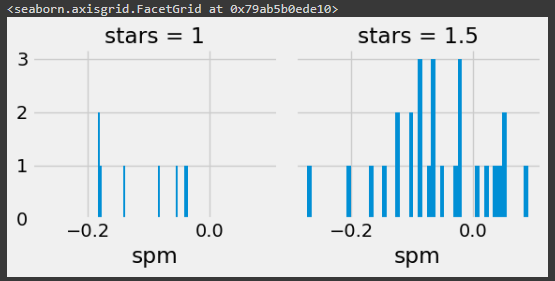

In [ ]:
g = sns.FacetGrid(data=cityfiltered, col='actual_rating',col_order=[2,2.5])
g.map(plt.hist, 'spm', bins=50)
g.set_axis_labels('spm', 'stars')
plt.show()

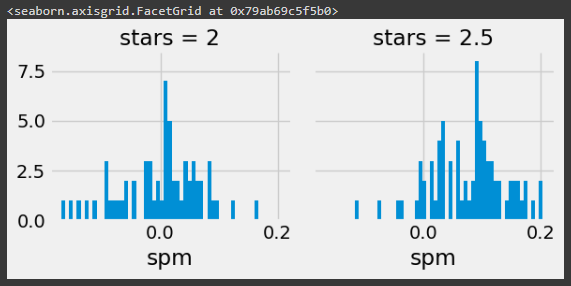

In [ ]:
g = sns.FacetGrid(data=cityfiltered, col='actual_rating',col_order=[3,3.5])
g.map(plt.hist, 'senti_polarity', bins=50)
g.set_axis_labels('spm', 'stars')
plt.show()

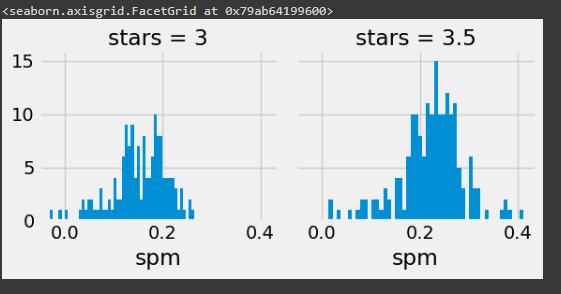

In [ ]:
g = sns.FacetGrid(data=cityfiltered, col='actual_rating',col_order=[4,4.5,5])
g.map(plt.hist, 'senti_polarity', bins=50)
g.set_axis_labels('spm', 'stars')
plt.show()

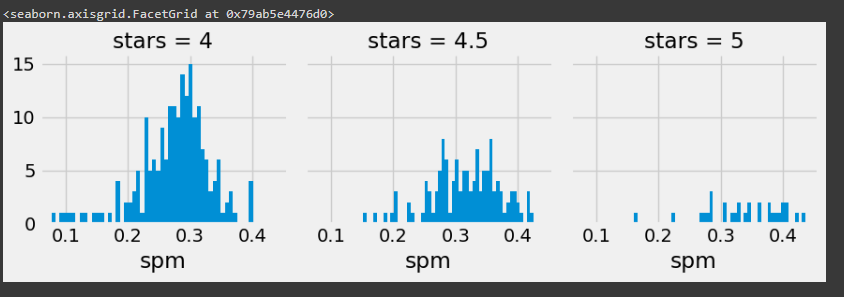

# Conclusion from above graph: stars more than 3.5 are all distributed between the range 0 and 0.5 of sentipolarity values.
-->Now considering only the rows that have values greater than 3.5 stars and sentipolarity value greater than 0


In [47]:
goodfood= food_merged[(food_merged['spm']>0)&(food_merged['actual_rating']>3.5)]
goodfood

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Caters,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,useful,funny,cool,text,date,year,text_clear,senti_polarity,predicted_rating,spm
0,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,I don't know. I wanted to check this out since...,2013-04-11 05:04:13,2013.0,dont know wanted check since im sort checking ...,0.462031,3.655079,0.470601
1,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,Finally an authentic Mexican taqueria! You kno...,2015-06-08 22:19:33,2015.0,finally authentic mexican taqueria know youre ...,0.480628,3.701570,0.470601
2,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,Are you kidding me? Another taco emporium wort...,2012-03-31 02:33:39,2012.0,kidding another taco emporium worthy star wilm...,0.479818,3.699544,0.470601
3,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,"Good place for hangover ,not a usual place to ...",2017-12-03 13:57:46,2017.0,good place hangover usual place eat great food...,0.470312,3.675781,0.470601
4,True,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,"I LOVE this place! Hands down, the best authen...",2011-08-30 19:42:24,2011.0,love place hands best authentic mexican ive ar...,0.471459,3.678649,0.470601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,0.0,0.0,0.0,"Awesome, get the bahn mi for a quick lunch san...",2014-10-09 05:31:23,2014.0,awesome get bahn mi quick lunch sandwich yello...,0.463843,3.659607,0.466791
4996,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,3.0,1.0,2.0,They messed up Pad Thai. Their version wa burn...,2018-06-03 22:28:45,2018.0,messed pad thai version wa burnt flavorless ch...,0.468179,3.670447,0.466791
4997,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,2.0,0.0,0.0,I never noticed this restaurant before because...,2015-05-19 18:48:06,2015.0,never noticed restaurant take walk work opposi...,0.469107,3.672767,0.466791
4998,True,2.0,False,0:0-0:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,...,0.0,0.0,0.0,Just got back from having dinnner there and th...,2017-07-16 02:41:38,2017.0,got back dinnner food wa excellent ordered spr...,0.467456,3.668639,0.466791


In [48]:
fff = goodfood[['name', 'actual_rating']].astype(str).apply(lambda x: '->Rating: '.join(x), axis=1)
fff.unique()

array(['taqueria los primos->Rating: 4.0',
       'pecos liquor store->Rating: 5.0', "trader joe's->Rating: 4.5",
       'sakura japanese restaurant->Rating: 4.0',
       'bellefonte brewing->Rating: 4.5',
       'bardea food & drink->Rating: 4.5',
       "mary's kountry kitchen->Rating: 4.0",
       'maryland avenue sub shop->Rating: 4.0', 'swigg->Rating: 5.0',
       "walt's chicken express->Rating: 4.0",
       'ristorante attilio->Rating: 4.0',
       'cafe napoli restaurant & pizzeria->Rating: 4.0',
       'avenue wines & spirits->Rating: 4.5',
       'village green flower shop->Rating: 4.5', 'mr. pasta->Rating: 4.0',
       'the mayne dish->Rating: 4.5',
       "russell's quality food->Rating: 4.5",
       'wards fine wines & liquors->Rating: 5.0',
       'bubble shack->Rating: 4.5', 'ice cream delight->Rating: 4.5',
       "walter's steakhouse->Rating: 4.0",
       'riverfront bakery->Rating: 4.5', 'i m coffee->Rating: 4.0',
       'brown bag deli and grocery->Rating: 4.5',
    

# Lets find the top best restaurants on YELP!!
# based on the stars and the highest senti polarity values

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set the number of restaurants to display
num_restaurants = 20

# Calculate the average sentiment score for each restaurant
top_restaurants = goodfood['business_id'].unique().tolist()
review_top = goodfood.loc[goodfood['business_id'].isin(top_restaurants)]
avg_sentiment = review_top.groupby(review_top.name)['spm'].mean()

# Sort the restaurants by ascending sentiment score
avg_sentiment = avg_sentiment.sort_values(ascending=True)

# Select the top n restaurants
top_restaurants = avg_sentiment.index.tolist()[:num_restaurants]

# Filter the review data based on the top restaurants
review_top = review_top[review_top.name.isin(top_restaurants)]
avg_sentiment = review_top.groupby(review_top.name)['spm'].mean()

# Create a color map for the bars
cmap = cm.get_cmap('tab20')
colors = cmap(range(len(top_restaurants)))

# Create a bar chart of the average sentiment score for each restaurant with different colors
plt.figure(figsize=(16, 12))
for i, restaurant in enumerate(top_restaurants):
    plt.barh(restaurant, avg_sentiment[restaurant], align='center', color=colors[i])

plt.yticks(fontsize=14)
plt.title(f'Top {num_restaurants} restaurants on Yelp by average sentiment score', fontsize=20)
plt.ylabel('Restaurants', fontsize=16)
plt.xlabel('Sentiment score', fontsize=16)

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()


In [50]:
cuisinelist=['indian','mexican','thai','japanese','italian','chinese','hungarian','german','vietnamese']
cuisinelist

['indian',
 'mexican',
 'thai',
 'japanese',
 'italian',
 'chinese',
 'hungarian',
 'german',
 'vietnamese']

In [51]:
food_merged[['category1','category2','category3','category4','category5','category6','category7','category8','category9','category10']]

,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,mexican,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mexican,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mexican,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mexican,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mexican,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,grocery,food,asian fusion,thai,restaurants,vietnamese,specialty food,NaN,NaN,NaN
4996,grocery,food,asian fusion,thai,restaurants,vietnamese,specialty food,NaN,NaN,NaN
4997,grocery,food,asian fusion,thai,restaurants,vietnamese,specialty food,NaN,NaN,NaN
4998,grocery,food,asian fusion,thai,restaurants,vietnamese,specialty food,NaN,NaN,NaN


In [ ]:
cuisine=input("Enter Cuisine: ")

In [52]:
import pandas as pd

# Assuming you have a DataFrame named 'goodfood' with the specified columns
# Replace 'your_dataset.csv' with the actual path to your CSV file


def search_restaurants( cuisine):
    # Filter based on the given city
    # city_filtered = goodfood[goodfood['city'] == city]

    # Filter based on the given cuisine in category1 to category10 columns
    cuisine_filtered = food_merged[
        (food_merged['category1'] == cuisine) |
        (food_merged['category2'] == cuisine) |
        (food_merged['category3'] == cuisine) |
        (food_merged['category4'] == cuisine) |
        (food_merged['category5'] == cuisine) |
        (food_merged['category6'] == cuisine) |
        (food_merged['category7'] == cuisine) |
        (food_merged['category8'] == cuisine) |
        (food_merged['category9'] == cuisine) |
        (food_merged['category10'] == cuisine)
    ]

    return cuisine_filtered

# Example usage:
# given_city = 'Wilmington' defined earlier
given_cuisine = 'mexican'

result = search_restaurants(given_cuisine)

# Print the filtered DataFrame
print(result)

     BusinessAcceptsCreditCards  RestaurantsPriceRange2 Caters   Monday  \
0                          True                     1.0  False      NaN   
1                          True                     1.0  False      NaN   
2                          True                     1.0  False      NaN   
3                          True                     1.0  False      NaN   
4                          True                     1.0  False      NaN   
...                         ...                     ...    ...      ...   
4892                      False                     NaN    NaN  6:0-1:0   
4893                      False                     NaN    NaN  6:0-1:0   
4894                      False                     NaN    NaN  6:0-1:0   
4895                      False                     NaN    NaN  6:0-1:0   
4896                      False                     NaN    NaN  6:0-1:0   

      Tuesday Wednesday Thursday   Friday Saturday   Sunday  ... useful funny  \
0         NaN     

In [53]:
final_list = []

for i in result.index:
    final_list.append(result.loc[i, ['name', 'actual_rating','text','address', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'RestaurantsPriceRange2','senti_polarity' ]])

final = pd.concat(final_list, axis=1).T

In [54]:
f1=final.sort_values('senti_polarity', axis=0, ascending=False).head(10)
f1

,name,actual_rating,text,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,RestaurantsPriceRange2,senti_polarity
13,taqueria los primos,4.0,Popped in on spur of the moment in Wilmington ...,3322 old capitol trl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.48336
2298,pachamama rotisserie chicken,4.0,This place is simply amazing. Don't hit up the...,3 s orange st,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-16:0,NaN,NaN,0.482855
2280,pachamama rotisserie chicken,4.0,Major key restaurant. I would match with this ...,3 s orange st,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-16:0,NaN,NaN,0.48063
1,taqueria los primos,4.0,Finally an authentic Mexican taqueria! You kno...,3322 old capitol trl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.480628
2296,pachamama rotisserie chicken,4.0,"Yum! I love everything about this restaurant, ...",3 s orange st,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-16:0,NaN,NaN,0.48048
2299,pachamama rotisserie chicken,4.0,This food make me want to salsa all the way to...,3 s orange st,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-16:0,NaN,NaN,0.479985
2,taqueria los primos,4.0,Are you kidding me? Another taco emporium wort...,3322 old capitol trl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.479818
17,taqueria los primos,4.0,The most authentic Latin food place I have bee...,3322 old capitol trl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.479144
2245,pachamama rotisserie chicken,4.0,My coworkers and I wanted this place to be goo...,3 s orange st,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-16:0,NaN,NaN,0.478839
14,taqueria los primos,4.0,You simply can't find a better Mexican place i...,3322 old capitol trl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.477336
